In [2]:
# https://blog.paperspace.com/train-yolov5-custom-data/?_keyword=&_device=c&utm_term=&utm_campaign=DSA_USA&utm_source=google&utm_medium=cpc&gad_source=1

In [4]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(5)

In [21]:
base_path = 'data/yolodata/'

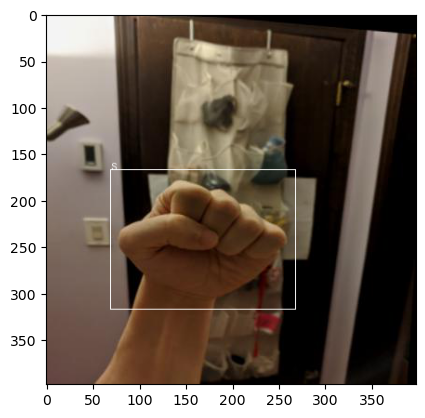

In [42]:
annotations = [os.path.join(base_path + 'labels', x) for x in os.listdir(base_path + 'labels') if x[-3:] == "txt"]
annotations.sort()

class_id_to_name_mapping = {x: chr(ord('A')+x)for x in range(26)}

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()
    
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split(" ")
    annotation_list = [float(x) for x in annotation_list]
    
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

image = Image.open(image_file)
plot_bounding_box(image, [annotation_list])

In [45]:
images = [os.path.join(base_path + 'images', x) for x in os.listdir(base_path + 'images')]
annotations = [os.path.join(base_path + 'labels', x) for x in os.listdir(base_path + 'labels') if x[-3:] == "txt"]

images.sort()
annotations.sort()

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [50]:
!mkdir data/yolodata/images/train data/yolodata/images/val data/yolodata/images/test data/yolodata/labels/train data/yolodata/labels/val data/yolodata/labels/test

In [52]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, base_path + 'images/train')
move_files_to_folder(val_images, base_path + 'images/val/')
move_files_to_folder(test_images, base_path + 'images/test/')
move_files_to_folder(train_annotations, base_path + 'labels/train/')
move_files_to_folder(val_annotations, base_path + 'labels/val/')
move_files_to_folder(test_annotations, base_path + 'labels/test/')

data/yolodata/images/C21_jpg.rf.acf50ed5e3a1dd34d903ba5769a62319.jpg


AssertionError: 